### <font color = Lightgreen></center>  **APPLIANCES ENERGY CONSUMPTION PREDICTION**   </fonts>

#### <font color = Pink></center>  **PROBLEM STATEMENT**   </fonts>

The Increasing Demand for Energy has lead to a significant rise in greenhouse gas emissions,contributing to climate change .
Optimizing energy consumption has become a critical concern for households , businesses governments worldwide.
In response this Project aims to develop a predictive model that forecasts appliance energy consumption using 
a comprehensive dataset of environmental factors and appliance usage patterns.
For that, I implement all regression models and conduct model evluation techniques and following steps to find 
the best performance model.

#### <font color = Pink></center>  **PROBLEM DESCRIPTION**   </fonts>

The appliances energy prediction dataset contains measurements of appliance energy 
consumption and various environmental factors such as temparature,Humidity and 
outdoor weather conditions .However Predicting appliance energy consumption remains a 
challenging task due to the complexity of the realtionships between these factors.

#### <font color = Pink></center>  **PROJECT OBJECTIVES**   </fonts>

To develop a predictive model that accurately forecasts appliance energy consumption. 
To Identify the most significant environmental factors that impact appliance energy consumption. 
To provide Insights and recommendations for households and businesses to optimize their energy usage 
and reduce waste.

###### <font color = Pink></center>  **DATASET CHARACTERISTICS**   </fonts>

###### <font color = Lightblue></center>  **Type:**   </fonts>   Regression

###### <font color = Lightblue></center>  **Features:**   </fonts>  29 Features Including Temparature,Humidity ,Lighting ,Appliance Usage

###### <font color = LightBlue></center>  **Target Variable:**   </fonts>  Energy Consumption of Appliances(In Wh)

###### <font color = LightBlue></center>  **Target Variable:**   </fonts>  Energy Consumption of Appliances(In Wh)

###### <font color = LightBlue></center>  **Source:**   </fonts> UCI Machine learning Repository

#### <font color = Lightgreen></center>  **LOADING AND PREPROCESSING**   </fonts>

##### <font color = Pink></center>  **Import Necessary Libraries**   </fonts>

In [3]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

#### <font color = Pink></center>  **Load the Dataset**   </fonts>

In [9]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\appliances+energy+prediction.zip")
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


#### <font color = Pink></center>  **Structure of the dataset**   </fonts>

##### <font color = Lightblue></center>  _Shape of the Dataset_   </fonts>

In [11]:
print ("Shape of the dataset is" , data.shape)

Shape of the dataset is (19735, 29)


##### <font color = Lightblue></center> _Display First few rows_   </fonts>

In [13]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


##### <font color = LightBlue></center>  _Data Information_  </fonts>

In [13]:
print("\nFeature names and its datatypes:")
data.info()


Feature names and its datatypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8        

##### <font color = LightBlue></center>  _Statistical Analysis of the data_  </fonts>

In [16]:
print("Summary Statistics of the data:")
print("\t")
data.describe()

Summary Statistics of the data:
	


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


##### <font color = LightBlue></center> _Column Names of Dataset_ </fonts>

In [18]:
print("Columns of the dataset:")
data.columns

Columns of the dataset:


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

#### <font color = Pink></center>  **Check Missing Values**   </fonts>

In [20]:
#Find the Missing values or null Values
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

#### <font color = Pink></center>  **Check Missing Values**   </fonts>

In [22]:
#Find Duplicate Values in dataset
print("Duplicates in the dataset are:")
data.duplicated().sum()

Duplicates in the dataset are:


0

### <font color = Lightgreen></center>  **UNIVARIATE ANALYSIS**   </fonts>

#### <font color = Pink></center>  **_Histogram to Visualize Feature Distribution_**   </fonts>

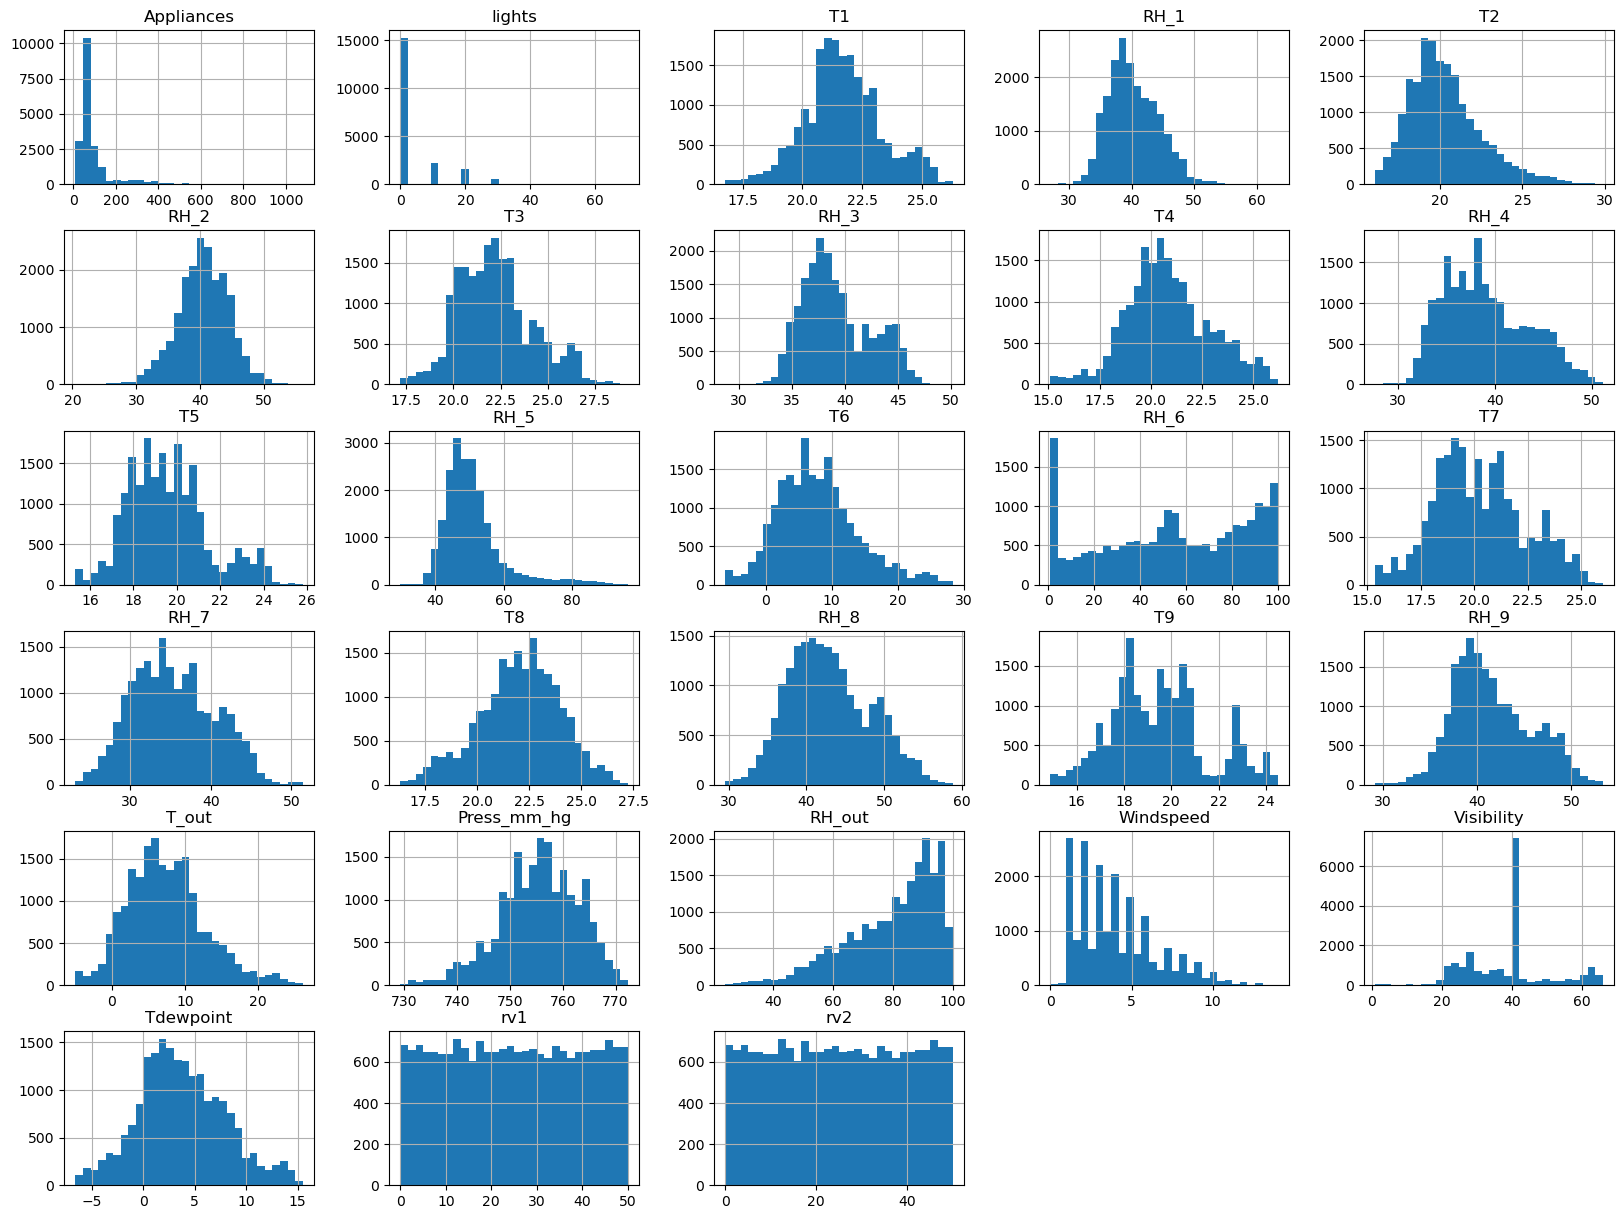

In [23]:
data.hist(figsize=(20,15) ,bins=30)
plt.show()

#### <font color = Pink></center>  _Boxplot to find Outliers_    </fonts>

<function matplotlib.pyplot.show(close=None, block=None)>

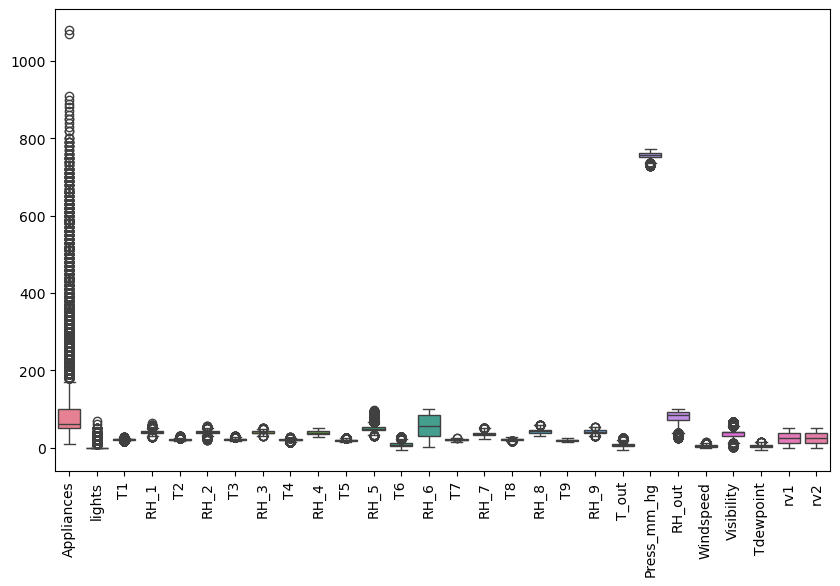

In [24]:
#Boxplot detecting outliers in energy consumpion
plt.figure(figsize=(10,6))
sns.boxplot(data = data)
plt.xticks(rotation=90)
plt.show

#### <font color = Pink></center>  _Time Series LinePlot_  </fonts>

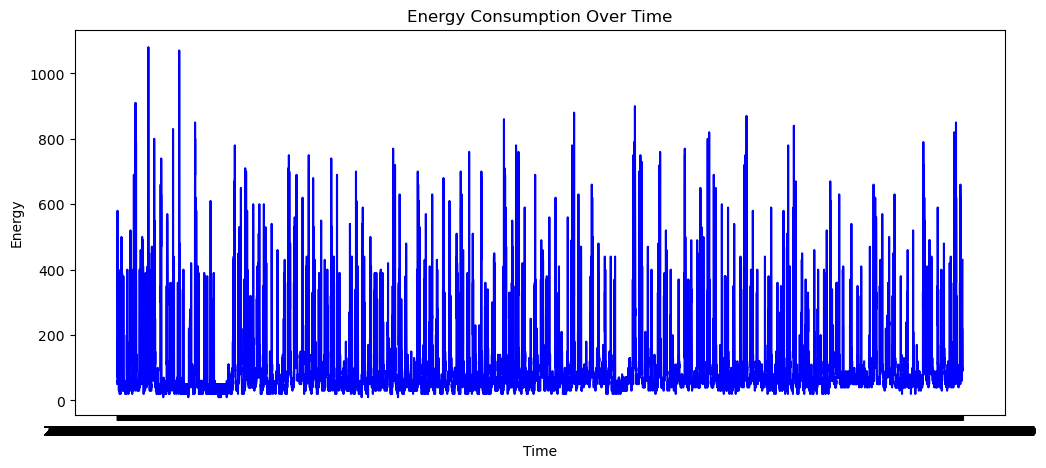

In [34]:
plt.figure(figsize=(12,5))
plt.plot(data['date'],data['Appliances'],color='blue')
plt.title("Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

### <font color = Lightgreen></center>  **BIVARIATE ANALYSIS**   </fonts>

#### <font color = Pink></center>  _Correlation heatmap_    </fonts>

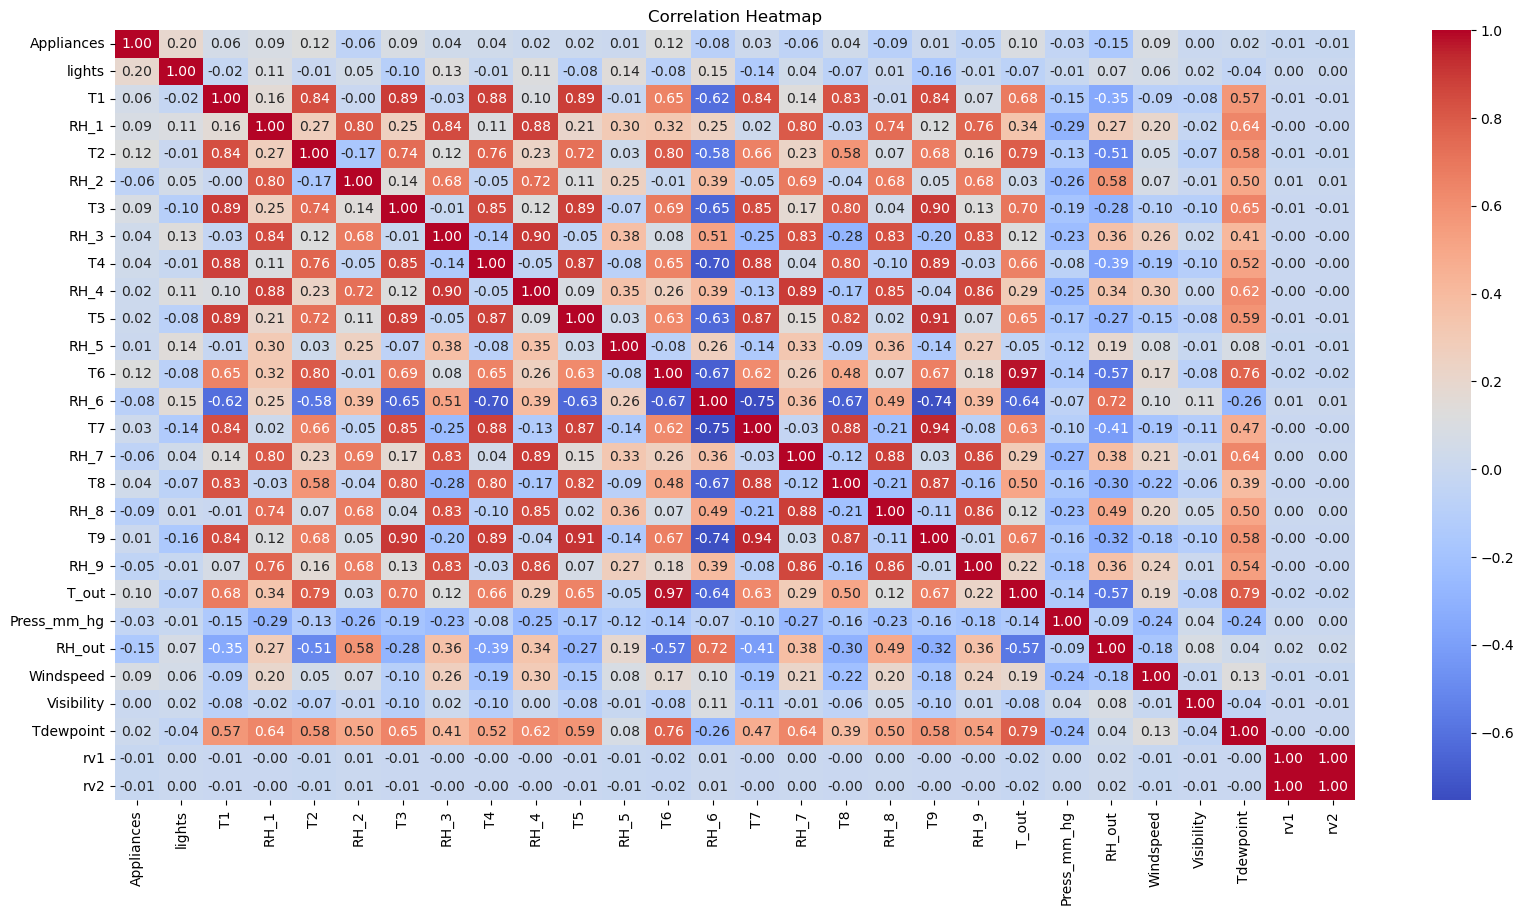

In [35]:
#Correlation Heatmap - Feature relationships
numerical_data = data.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(20,10))
sns.heatmap(numerical_data.corr(),annot=True ,cmap ='coolwarm',fmt =".2f")
plt.title("Correlation Heatmap")
plt.show()

#### <font color = Pink></center> _Scatterplot of Temparature Vs Energy Consumption_    </fonts>

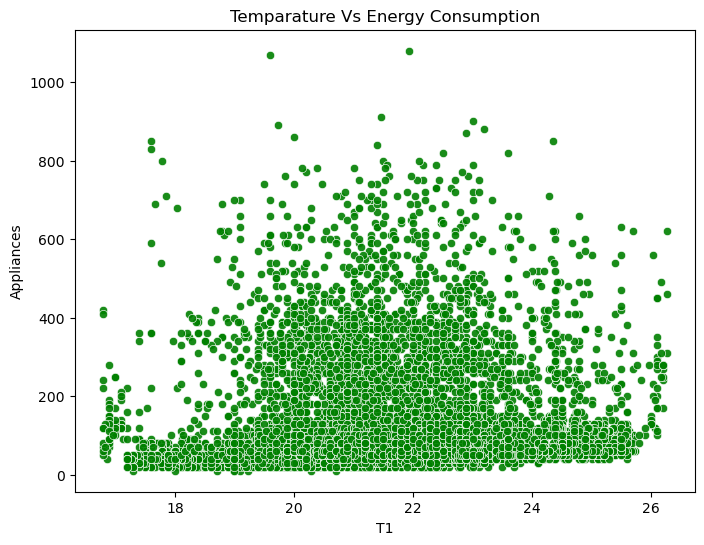

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['T1'],y=data['Appliances'],alpha =0.9,color='green')
plt.title("Temparature Vs Energy Consumption")
plt.show()

#### <font color = Lightgreen></center> MULTIVARIATE ANALYSIS   </fonts>

#### <font color = Pink></center> _Pairplot - Relationship between multiple features_   </fonts>

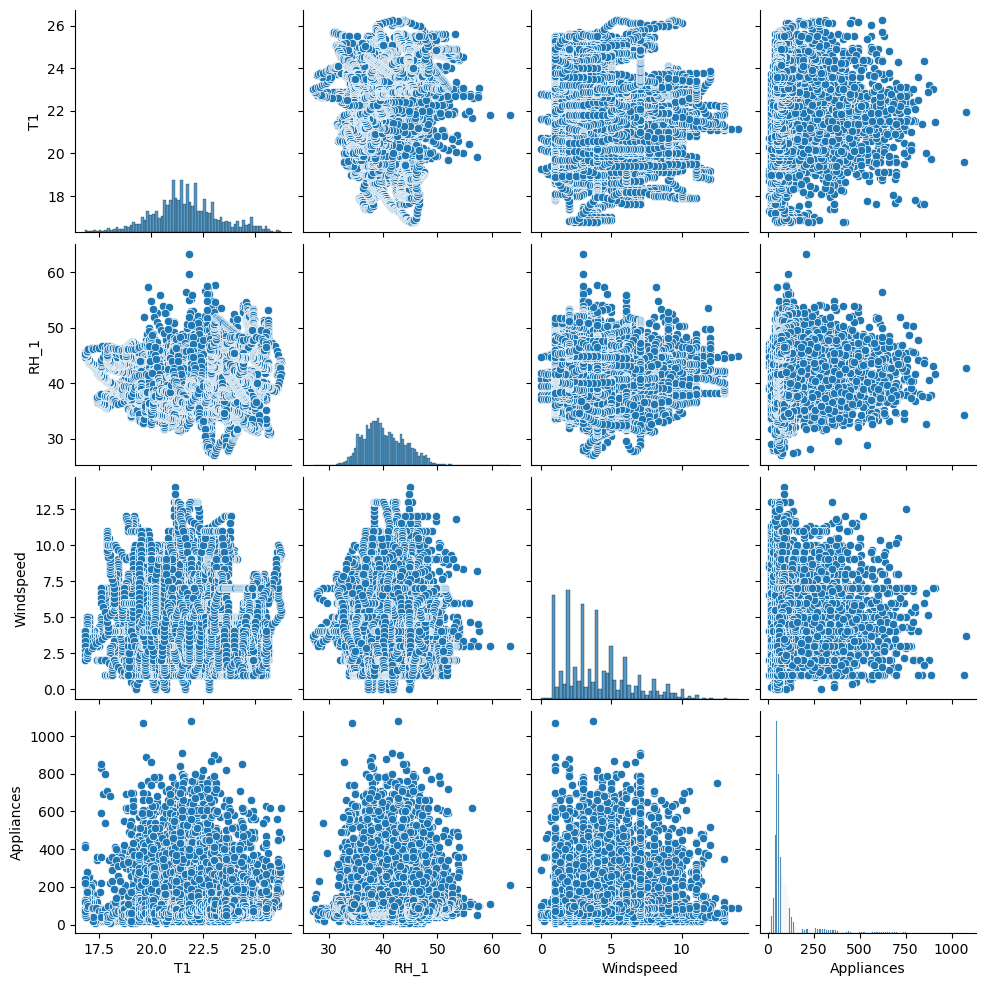

In [37]:
sns.pairplot(data[['T1','RH_1','Windspeed','Appliances']])
plt.show()

#### <font color = Pink></center> _Average Energy consumption by hour of the day_   </fonts>

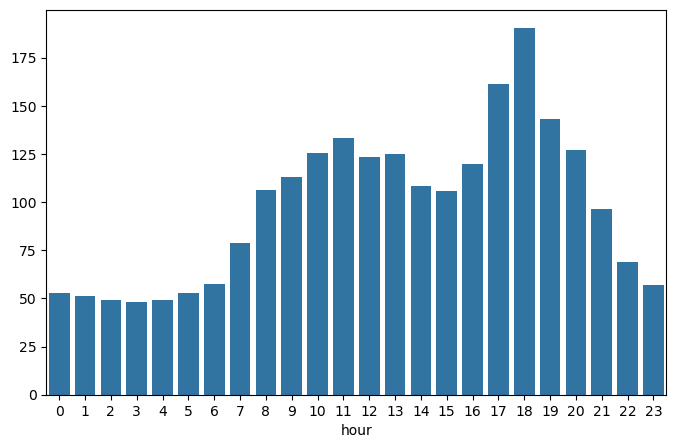

In [26]:
#Extract hour faeture from date column
data['hour'] = pd.to_datetime(data['date']).dt.hour


Hourly_consumption = data.groupby('hour')['Appliances'].mean()

#plot barplot to visualise Average energy consumption by hour of the day
plt.figure(figsize=(8,5))
sns.barplot(x=Hourly_consumption.index ,y=Hourly_consumption.values)
plt.show()

#### <font color = Pink></center>   _Skewness and Kurtosis_  </fonts>

In [28]:
numeric_columns = data.select_dtypes(include=['int64','float64']).columns

skewness = data[numeric_columns].skew()
Kurtosis = data[numeric_columns].kurt()
print(f"skewness:{skewness}")
print(f"\nKurtosis:{Kurtosis}")

skewness:Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
dtype: float64

Kurtosis:Appliances     13.667863
lights          4.462147
T1              0.161601
RH_1            0.112629
T2              0.933397
RH_2            0.670959
T3             -0.007055
RH_3           -0.583126
T4             -0.037633
RH_4           -0.613967
T5              0.112724
RH_5            4.5

In [30]:
skewed_columns = skewness[abs(skewness) > 1].index
kurtotic_columns = Kurtosis[abs(Kurtosis) > 3].index

#### <font color = Pink></center>  _Detection of Ouliers_    </fonts>


In [32]:
z_scores = {}
for col in skewed_columns:
    z_scores[col] =np.abs(stats.zscore(data[col]))
Threshold = 3
outliers ={}
for col ,z_score in z_scores.items():
    outliers[col] = data[z_score > Threshold]
cleaned_data =data.drop(outliers[col].index)

In [34]:
print("Shape of the dataset before removing Ouliers is" , data.shape)
print("Shape of the dataset after removing outliers is" , cleaned_data.shape)

Shape of the dataset before removing Ouliers is (19735, 30)
Shape of the dataset after removing outliers is (19168, 30)


#### <font color = Pink></center>  _Feature Engineering_    </fonts>

In [36]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract new time-based features
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month

In [38]:
# Drop the original 'date' column (if it's not needed)
data.drop(columns=['date'], inplace=True)

#### <font color = Pink></center>  _Feature Selection_   </fonts>

In [40]:
numerical_cols = cleaned_data.select_dtypes(include=['number']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data[numerical_cols])
scaled_data

array([[-0.36054751,  3.37678474, -1.11089465, ..., -0.81088052,
        -0.81088052,  0.82225624],
       [-0.36054751,  3.37678474, -1.11089465, ..., -0.44268997,
        -0.44268997,  0.82225624],
       [-0.4582388 ,  3.37678474, -1.11089465, ...,  0.25051952,
         0.25051952,  0.82225624],
       ...,
       [ 1.6909695 ,  0.81118592,  2.37045964, ...,  0.2889529 ,
         0.2889529 ,  0.82225624],
       [ 3.1563388 ,  0.81118592,  2.37045964, ..., -1.29109329,
        -1.29109329,  0.82225624],
       [ 3.25403008,  0.81118592,  2.37045964, ...,  0.62875413,
         0.62875413,  0.96741597]])

In [ ]:
#Find the optimum K using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
k_values = range(1, 11)  # Testing K from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Store WCSS for each K

# Determine the "elbow" point (Replace with your optimal K)
optimal_k = 2  # Manually select or use KneeLocator for automation

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b', label="WCSS")

# Highlight the optimum K value
plt.scatter(optimal_k, wcss[optimal_k - 1], color='green', s=150, marker='o', label=f"Optimum K={optimal_k}")
plt.annotate(f"K={optimal_k}", (optimal_k, wcss[optimal_k - 1]),
             textcoords="offset points", xytext=(-15, -10), ha='center', fontsize=12, color='green')

# Labels and Title
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.title("Elbow Method to Determine Optimum K")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [43]:
# Apply K-Means clustering (choosing k=2 based on the previous visualization)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Compute feature importance using cluster centers
feature_importance = np.std(kmeans.cluster_centers_, axis=0)

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': numerical_cols, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display most important features
print("Feature Importance based on K-Means Clustering:")
print(feature_importance_df)

# Select top N features (e.g., top 5)
top_features = feature_importance_df['Feature'].head(5).values
selected_data = cleaned_data[top_features]

print("Selected_features:" , top_features)

Feature Importance based on K-Means Clustering:
        Feature  Importance
18           T9    0.810516
14           T7    0.801885
8            T4    0.781614
10           T5    0.781446
6            T3    0.780966
13         RH_6    0.766844
20        T_out    0.763281
12           T6    0.757490
2            T1    0.744452
4            T2    0.743169
16           T8    0.687841
25    Tdewpoint    0.565219
22       RH_out    0.497575
3          RH_1    0.159889
28         hour    0.145410
1        lights    0.121954
11         RH_5    0.114490
7          RH_3    0.101414
24   Visibility    0.093152
21  Press_mm_hg    0.092709
17         RH_8    0.092155
0    Appliances    0.076833
23    Windspeed    0.072818
5          RH_2    0.060189
15         RH_7    0.057686
9          RH_4    0.034065
26          rv1    0.009625
27          rv2    0.009625
19         RH_9    0.000224
Selected_features: ['T9' 'T7' 'T4' 'T5' 'T3']


#### <font color = Pink></center> _Split Data Into Training and Testing_   </fonts>

In [ ]:
#Define the Features (X) and target variable(Y)
X= data.drop('Appliances',axis=1)
Y= data['Appliances']

#Split data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print("Training set size:" ,len(X_train))
print("Testing set size:" , len(X_test))

#### <font color = Pink></center> _Feature Scaling_  </fonts>

In [ ]:
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### <font color = Lightgreen></center>  **MODEL IMPLEMENTATION**   </fonts>

In [ ]:
# Initialize the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(X_train, Y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    # Save results
    results[name] = {"R-squared": r2, "MSE": mse, "MAE": mae}
    print(f"{name} - R-squared: {r2:.3f}, MSE: {mse:.3f}, MAE: {mae:.3f}")
    print("-" * 50)

# Display results in a DataFrame
results_df = pd.DataFrame(results).T  # Transpose for better readability
print("\nComparison of Model Performance:")
print(results_df)

# Sort the results by R-squared for better visualization
sorted_results = results_df.sort_values(by="R-squared", ascending=False)
print("\nSorted Results by R-squared:")
print(sorted_results)

Based on these metrics ,we can compare the performance of each model and select the one
with highest R2 Value,Lowest MSE Value and MAE Value.
In the sorted Result , the topmost model is Random forest Regressor .

The best model is the **Random Forest Regressor** ,which has the _highest R2 value_ (0.542),
indicating the best fit , and the _lowest MSE_ (4577.9) and _MAE_ (32.25) values ,indicating
the smallest average squared and absolute errors respectively.

#### <font color = Lightgreen></center>  **HYPERPARAMETER TUNING**   </fonts>

In [ ]:
# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

# Linear Regression has no hyperparameters to tune in this case
param_grid_lr = {}

# Initialize models
models = {
    "Random Forest": (RandomForestRegressor(random_state=42), param_grid_rf),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), param_grid_gb),
    "Decision Tree": (DecisionTreeRegressor(random_state=42), param_grid_dt),
    "Support Vector Regressor": (SVR(), param_grid_svr),
    "Linear Regression": (LinearRegression(), param_grid_lr)
}

# Perform GridSearchCV and evaluate performance
best_estimators = {}
for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    
    if param_grid:  # Skip GridSearchCV for models with no hyperparameters to tune
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, Y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, Y_train)  # Train model directly for Linear Regression
        best_model = model
    
    # Store the best estimator
    best_estimators[model_name] = best_model
    
    # Evaluate performance on the test set
    y_pred = best_model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    print(f"{model_name} Performance after Hyperparameter Tuning:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print("-" * 50)

#### <font color = Lightgreen></center>  **PIPELINE BUILDING**   </fonts>

In [ ]:
#Create a pipeline with scaling and modeling steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: scale the data
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))  # Modeling step: random forest regressor
])
#Train the pipeline
pipeline.fit(X_train, Y_train)
#Predictions on testing data
y_pred = pipeline.predict(X_test)
#Evaluate the performance of pipeline
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')